In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("car data.csv")

In [73]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [74]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [75]:
df.shape


(301, 9)

In [76]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [78]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [79]:
df_object_columns = df.select_dtypes(include='object')
print(df_object_columns)

    Car_Name Fuel_Type Selling_type Transmission
0       ritz    Petrol       Dealer       Manual
1        sx4    Diesel       Dealer       Manual
2       ciaz    Petrol       Dealer       Manual
3    wagon r    Petrol       Dealer       Manual
4      swift    Diesel       Dealer       Manual
..       ...       ...          ...          ...
296     city    Diesel       Dealer       Manual
297     brio    Petrol       Dealer       Manual
298     city    Petrol       Dealer       Manual
299     city    Diesel       Dealer       Manual
300     brio    Petrol       Dealer       Manual

[301 rows x 4 columns]


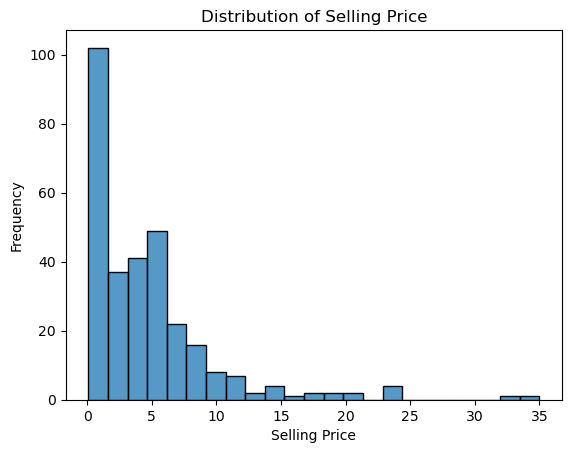

In [80]:
sns.histplot(df['Selling_Price'])
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency') 
plt.show()

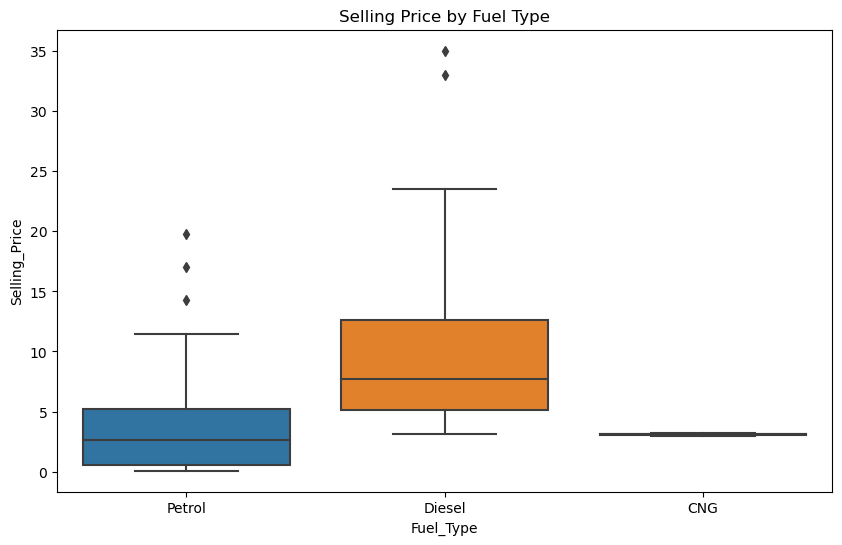

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type',y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')  
plt.show()

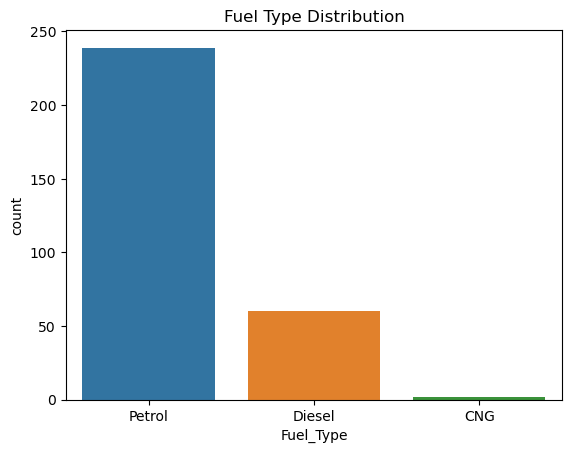

In [82]:
sns.countplot(data=df, x='Fuel_Type')
plt.title("Fuel Type Distribution")
plt.show()

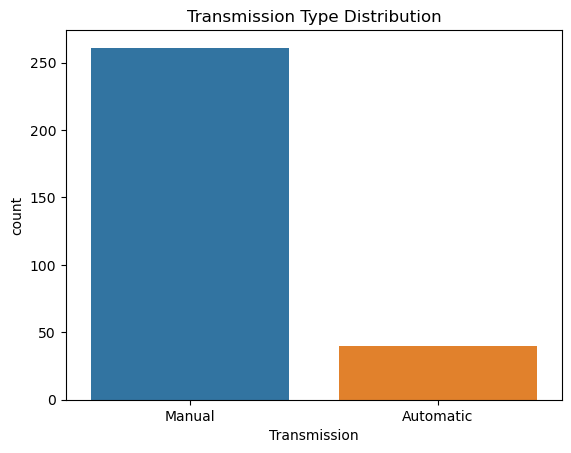

In [83]:
sns.countplot(data=df, x='Transmission')
plt.title("Transmission Type Distribution")
plt.show()

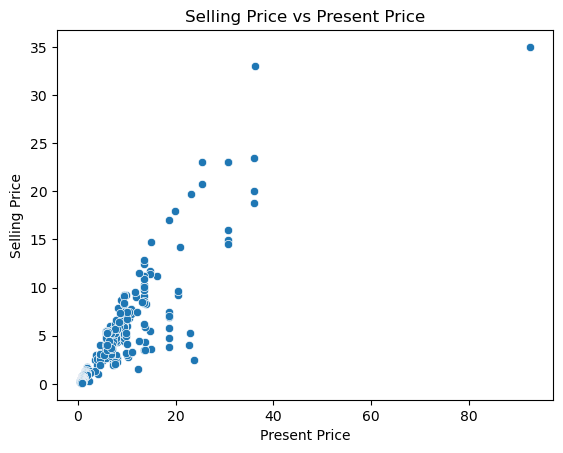

In [84]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title("Selling Price vs Present Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

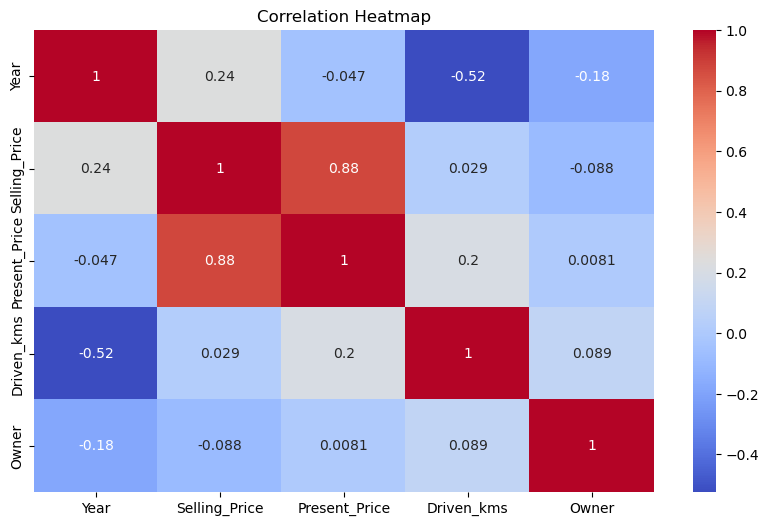

In [85]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [86]:
car_labels = LabelEncoder()
fuel_labels = LabelEncoder()
selling_labels = LabelEncoder()
transmission_labels = LabelEncoder()

In [87]:
df['Car_Name'] = car_labels.fit_transform(df['Car_Name'])
df['Fuel_Type'] = fuel_labels.fit_transform(df['Fuel_Type'])
df['Selling_type'] = selling_labels.fit_transform(df['Selling_type'])
df['Transmission'] = transmission_labels.fit_transform(df['Transmission'])

In [88]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
y_pred = model.predict(X_test)

In [92]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.782636952131147
R2 Score: 0.9660248711535068


In [93]:
sample = pd.DataFrame([{
    'Car_Name': car_labels.transform(['ritz'])[0],
    'Year': 2018,
    'Present_Price': 9.83,
    'Driven_kms': 2071,
    'Fuel_Type': fuel_labels.transform(['Diesel'])[0],
    'Selling_type': selling_labels.transform(['Dealer'])[0],
    'Transmission': transmission_labels.transform(['Manual'])[0],
    'Owner': 0
}])
predicted_price = model.predict(sample)
print("Predicted Selling Price for sample:", predicted_price[0])

Predicted Selling Price for sample: 8.0315
